In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

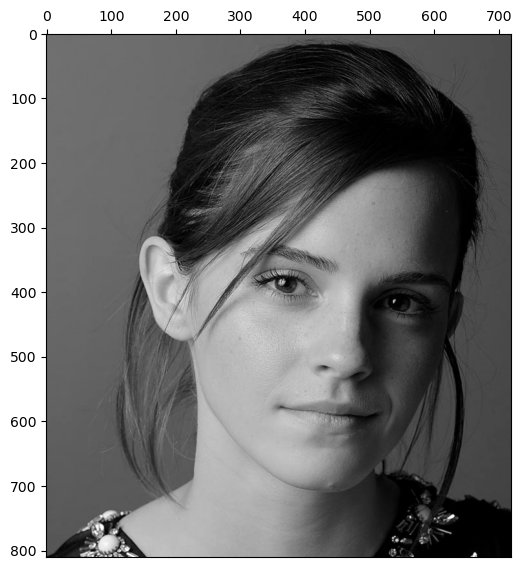

In [14]:
import cv2 as cv
import matplotlib.pyplot as plt
im = cv.imread('Assigment_1\\a1images\\a1images\\emma.jpg',cv.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()



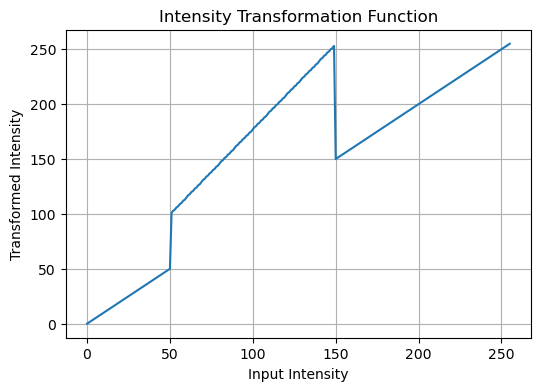

In [26]:
def intensity_transformation(im):
    mask= (im > 50) & (im < 150)
    trasformed_image = im.copy()
    trasformed_image[mask] = (255-100)/(150-50) * im[mask] + (100-(255-100)/100 * 50)
    return trasformed_image

x = np.arange(0, 256)
y = intensity_transformation(x)
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.title('Intensity Transformation Function')
plt.grid(True)
plt.show()

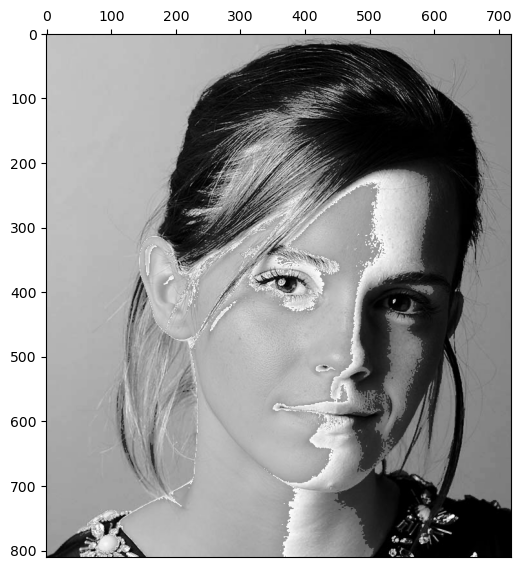

In [28]:
traformed_image =intensity_transformation(im)
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(traformed_image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

In [15]:
im

array([[111, 111, 111, ...,  77,  77,  77],
       [111, 111, 111, ...,  77,  77,  77],
       [111, 111, 111, ...,  77,  77,  77],
       ...,
       [ 83,  79,  72, ...,   0,   0,   0],
       [ 67,  58,  45, ...,   0,   0,   0],
       [ 40,  31,  18, ...,   0,   0,   0]], dtype=uint8)